## Gradio Pets

In [10]:
import timm
from fastai.vision.all import *

In [11]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

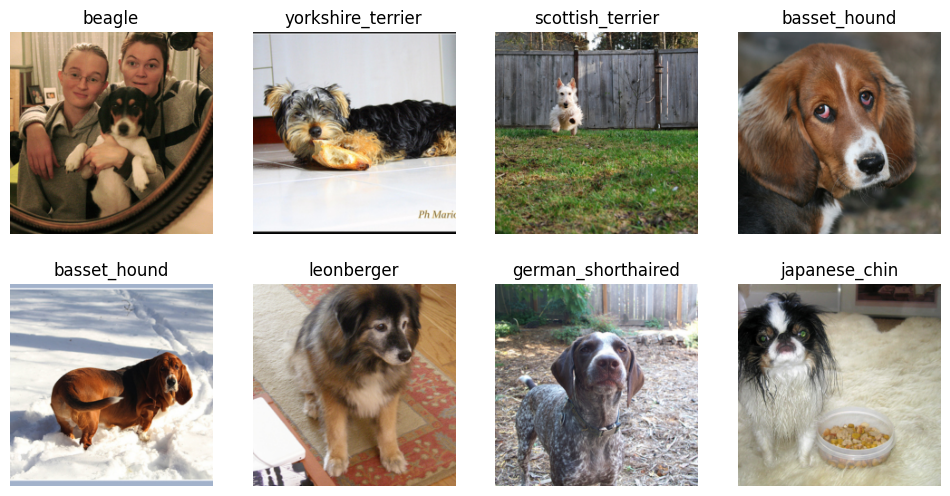

In [12]:
dls.show_batch(max_n=8)

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\voqua/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:10<00:00, 8.24MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.440704,0.320014,0.109608,02:47


epoch,train_loss,valid_loss,error_rate,time
0,0.453868,0.284331,0.085927,02:16
1,0.282839,0.225795,0.074425,02:15
2,0.144197,0.214313,0.065629,02:20


We could try a better model, based on [this analysis](https://www.kaggle.com/code/jhoward/which-image-models-are-best/). The convnext models work great!

In [13]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [14]:
learn = vision_learner(dls, 'convnextv2_pico', metrics=error_rate).to_fp16()
learn.fine_tune(3)

model.safetensors:   0%|          | 0.00/36.3M [00:00<?, ?B/s]

c:\Users\voqua\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\voqua\.cache\huggingface\hub\models--timm--convnextv2_pico.fcmae_ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


epoch,train_loss,valid_loss,error_rate,time
0,1.114435,0.289127,0.089986,03:36


epoch,train_loss,valid_loss,error_rate,time
0,0.335835,0.221309,0.068336,04:14
1,0.210662,0.183956,0.057510,04:21
2,0.114563,0.167041,0.050744,04:26


In [15]:
learn.export('model.pkl')

In [16]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=64)
              (norm): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p